# Run the whole deltas algorithm

In [55]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Hepatitis: 137
Number of attribues: 16
Classes total: 111 - 26

Classes train: 88 - 17
Classes test:  23 - 9


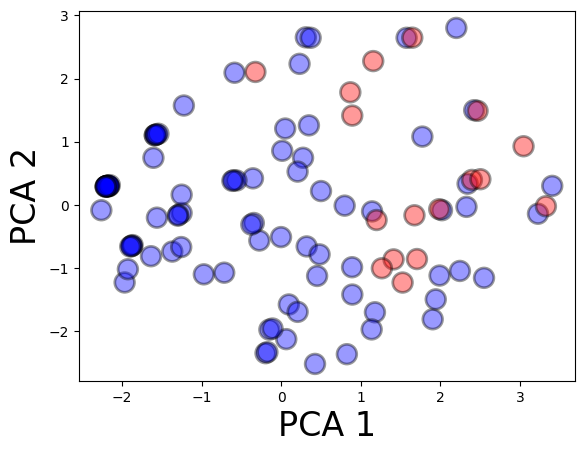

int64


In [56]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer', 15:'Hepatitis'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

dataset = datasets[15]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 2000, 'gamma': 0.0001, 'kernel': 'rbf'}
Baseline


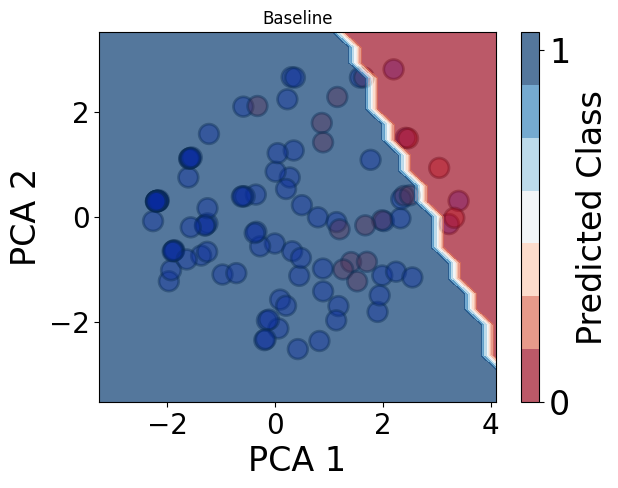

SMOTE


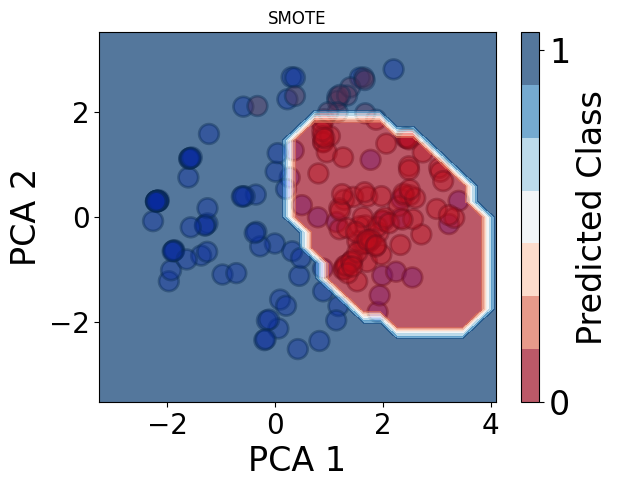

Balanced Weights


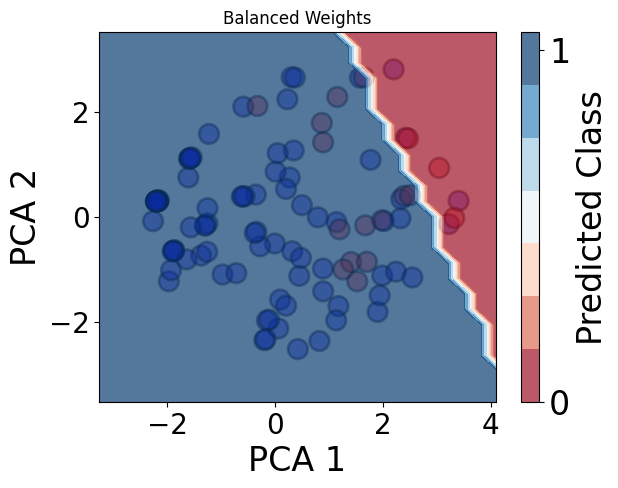

BMR


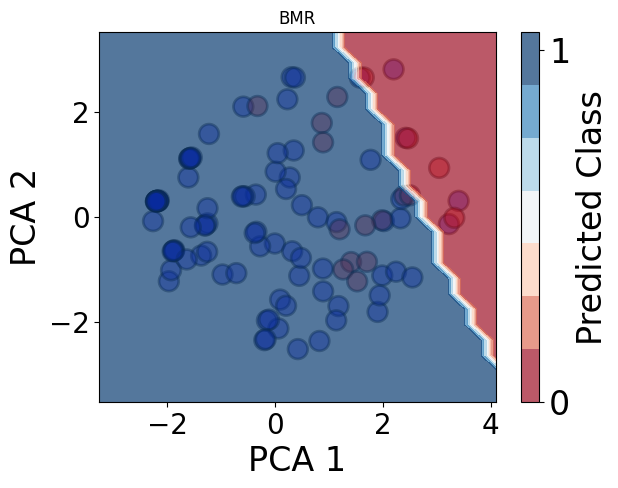

Threshold


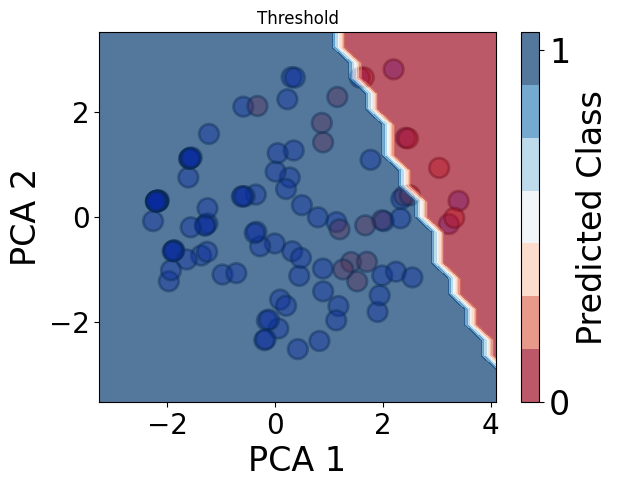

In [57]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data


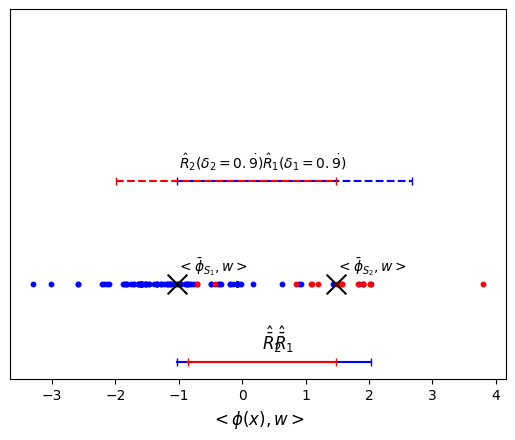

Budget 52 found 31 viable downsampled solutions
Best solution found by removing 15 data points
Downsampled Data:


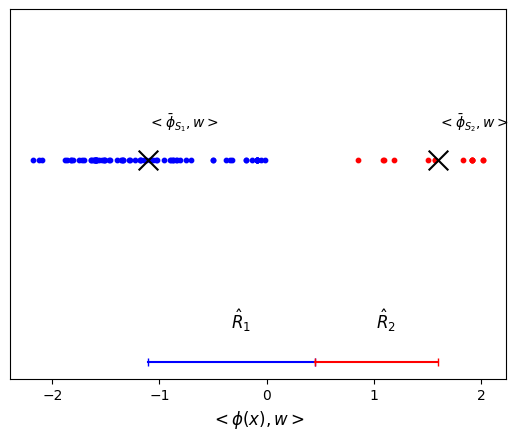

In [58]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

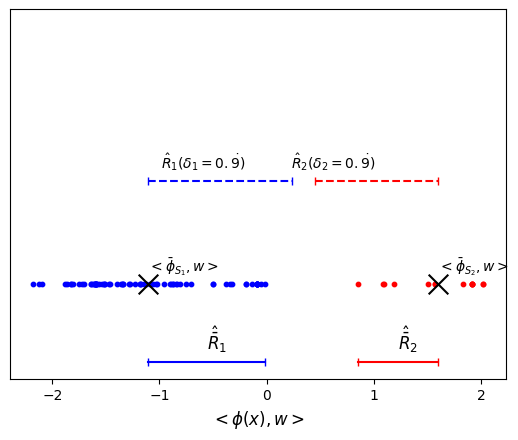

In [59]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [60]:
deltas_model.print_params()

Parameters
                R:  2.1849822269264223
                N1: 76
                N2: 14
                R1: 1.0952164375288924
                R2: 0.7485969993914847
                M:  0.8635284436902566
                D:  2.7073418806106337
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Baseline           0.78125  0.637022  0.678744  0.533333
SMOTE              0.78125  0.637022  0.678744  0.533333
Balanced Weights   0.78125  0.637022  0.678744  0.533333
BMR                0.78125  0.637022  0.678744  0.533333
Threshold          0.78125  0.637022  0.678744  0.533333
Our Method         0.81250  0.712212  0.734300  0.625000 


Baseline


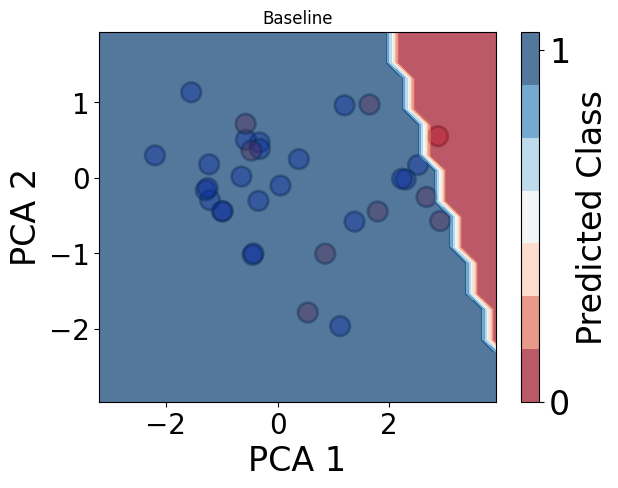

SMOTE


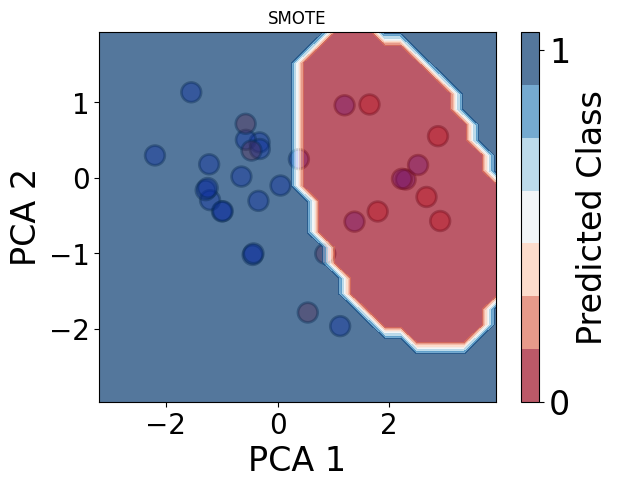

Balanced Weights


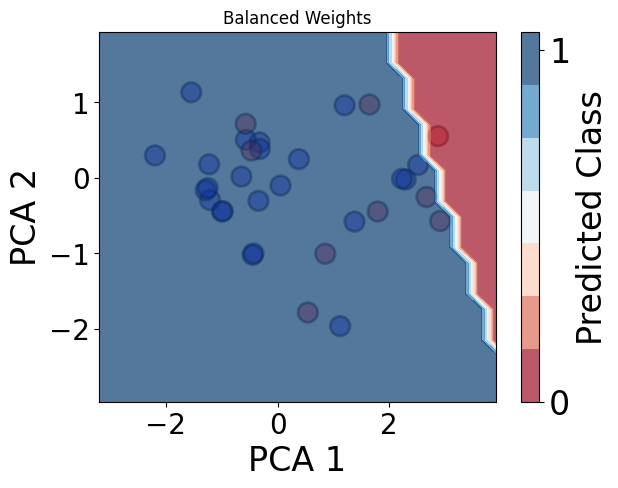

BMR


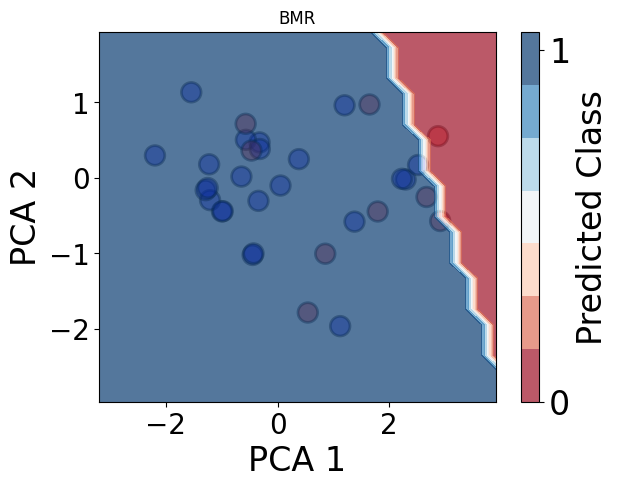

Threshold


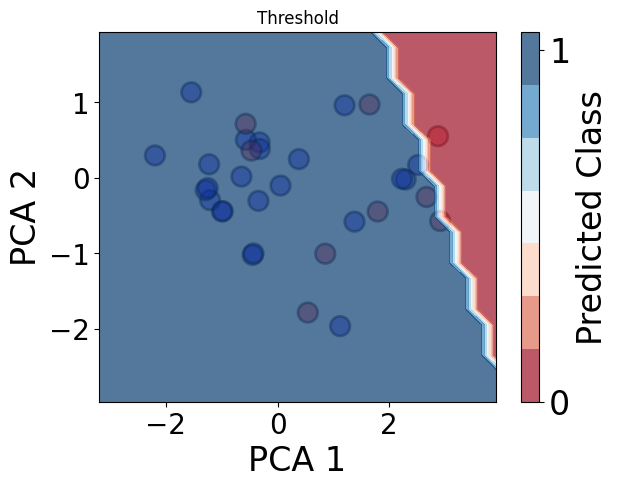

Our Method


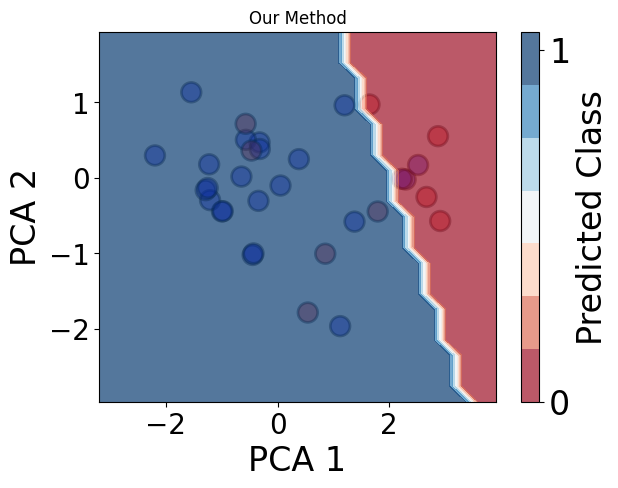

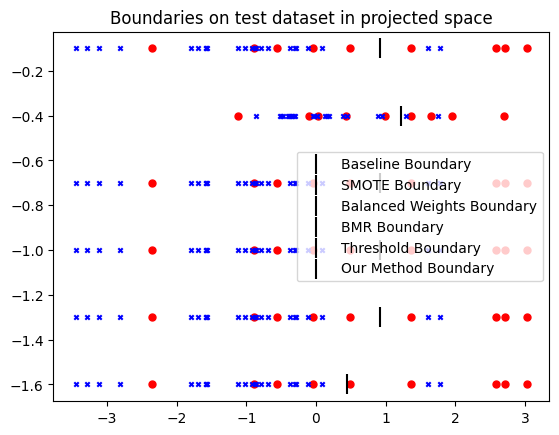

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.7812 & 0.6370 & 0.6787 & 0.5333 \\
SMOTE & 0.7812 & 0.6370 & 0.6787 & 0.5333 \\
Balanced Weights & 0.7812 & 0.6370 & 0.6787 & 0.5333 \\
BMR & 0.7812 & 0.6370 & 0.6787 & 0.5333 \\
Threshold & 0.7812 & 0.6370 & 0.6787 & 0.5333 \\
Our Method & 0.8125 & 0.7122 & 0.7343 & 0.6250 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.78125,0.637022,0.678744,0.533333
SMOTE,0.78125,0.637022,0.678744,0.533333
Balanced Weights,0.78125,0.637022,0.678744,0.533333
BMR,0.78125,0.637022,0.678744,0.533333
Threshold,0.78125,0.637022,0.678744,0.533333
Our Method,0.81250,0.712212,0.734300,0.625000


In [61]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])